In [1]:
import adddeps

from pltconf import *
from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sys, os
import re

In [16]:
name = "beta-omega-plot-data-Ensemble-5.4.lammps.csv"
df = pd.read_csv(name)
lbl = re.findall("(\d\.\d)\.lammps", name)[0]


In [17]:
def f_beta(x):
    return 3 * (1 - x**2)/(2 + np.sqrt(1 + 3 * x**2))
def f_omega(x):
    return np.sqrt(1 + 3 * x**2) - 1

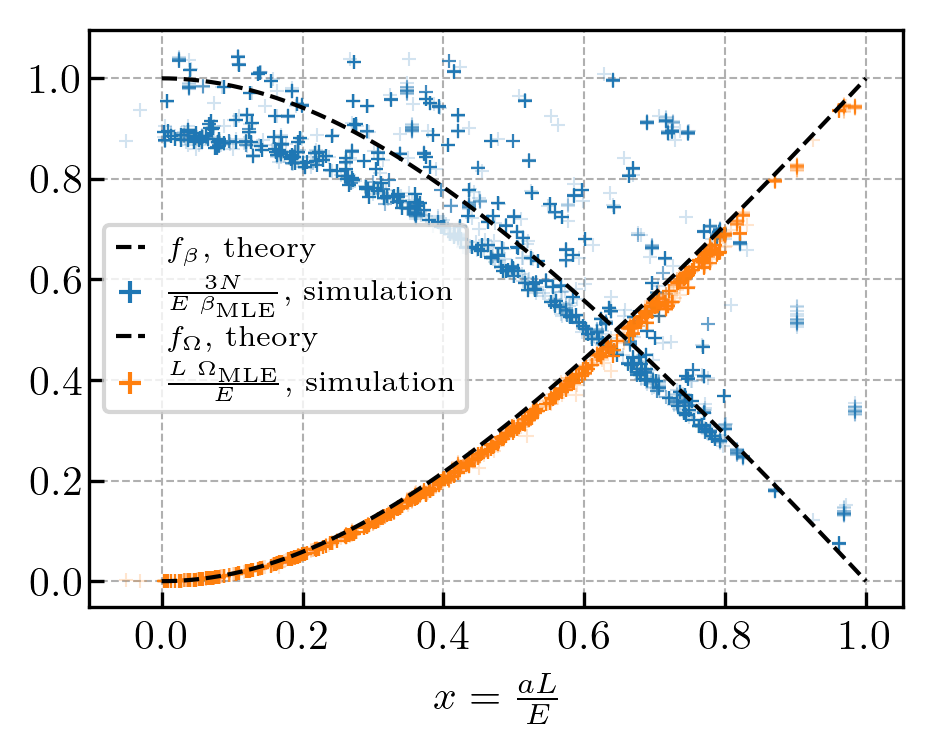

In [18]:
xs = np.linspace(0,1,100)
alpha=0.2

rasterized = True

plt.figure(dpi=300, figsize=(3.5,2.5))


ax = plt.gca()

plt.plot(xs, f_beta(xs), "k--", lw=1, label=r"$f_\beta$, theory")
plt.scatter(df["x"], df["y_beta"], marker="+", s=10,lw=0.5, 
            alpha=alpha, c=colors[0],label=r"$\frac{3 N}{ E \;\beta_\mathrm{MLE} }$, simulation",
           rasterized=rasterized)

plt.plot(xs, f_omega(xs), "k--", lw=1, label="$f_\Omega$, theory")
plt.scatter(df["x"], df["y_omega"], marker="+", s=10,lw=0.5, 
            alpha=alpha, c=colors[1], label=r"$\frac{L\;\Omega_\mathrm{MLE} }{E}$, simulation",
           rasterized=rasterized)

ax.tick_params(axis="x", which="both", direction="in",pad=3)
ax.tick_params(axis="y", which="both", direction="in",pad=1.5)
plt.xlabel(r"$x=\frac{a L}{E}$")

# plt.ylabel(r"$\frac{3 N}{ E \beta_{MLE} }$  and  $\frac{\Omega_{MLE} L}{E}$")
# plt.legend()

handles, labels = ax.get_legend_handles_labels()
handles[1] = plt.scatter([], [], marker='+',s=30,lw=1, c=colors[0])
handles[3] = plt.scatter([], [], marker='+',s=30,lw=1, c=colors[1])

# handles[1].set_linewidth(3)

plt.legend(handles, labels, prop={'size': 7}, labelspacing=0.3, handlelength=1)

ax.set_axisbelow(True)
plt.grid(ls='--', lw=0.5)

plt.savefig(f"bo-{lbl}.pdf", bbox_inches='tight')